# **Обучение без учителя**

## Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [2]:
boston = pd.read_csv('BostonHousing.csv')

boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Создайте датафреймы X и y из этих данных.

In [3]:
boston = pd.read_csv('BostonHousing.csv')
X = boston.drop('medv', axis=1)
y = boston['medv']

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

In [6]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne_model.fit_transform(X_train_scaled)

Постройте диаграмму рассеяния на этих данных.

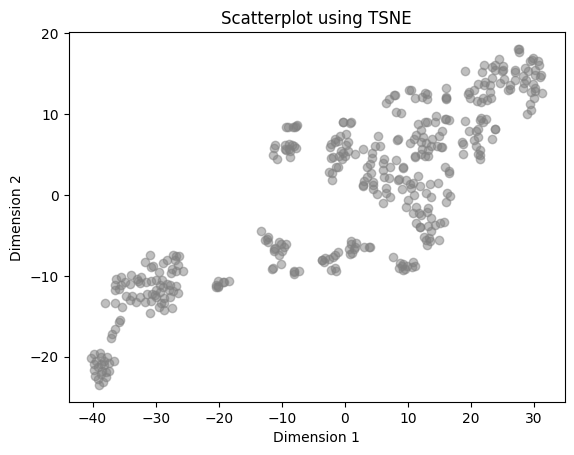

In [7]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c='grey', alpha=0.5)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatterplot using TSNE')
plt.show()

## Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [8]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=3, max_iter=100, random_state=42)
kmeans_model.fit(X_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=100, n_clusters=3, random_state=42)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

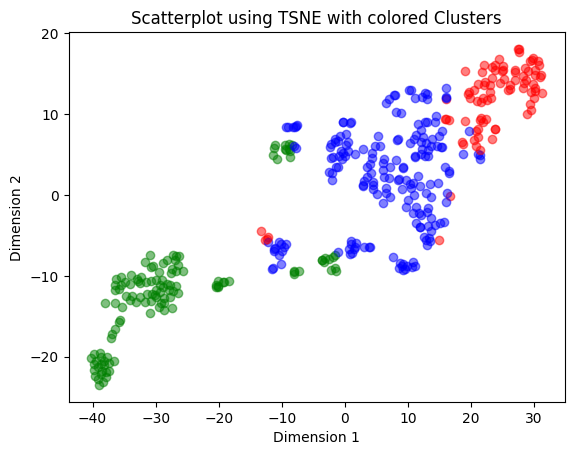

In [9]:
# Получение кластеров для каждой точки
clusters_train = kmeans_model.predict(X_train_scaled)

# Раскраска точек на диаграмме рассеяния
colors = ['r', 'g', 'b']
for i in range(len(clusters_train)):
    plt.scatter(X_train_tsne[i, 0], X_train_tsne[i, 1], color=colors[clusters_train[i]], alpha=0.5)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatterplot using TSNE with colored Clusters')
plt.show()

Вычислите средние значения medv и crim в разных кластерах.

In [10]:
data_train = X_train.copy()
data_train['medv'] = y_train
data_train['cluster'] = clusters_train

means_train = data_train.groupby('cluster').agg({'medv': 'mean', 'crim': 'mean'})
display(means_train)


,medv,crim
cluster,,
0,27.788372,0.073566
1,16.165354,10.797028
2,24.958115,0.421660


## Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

In [11]:
clusters_test = kmeans_model.predict(X_test_scaled)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [12]:
data_test = X_test.copy()
data_test['medv'] = y_test
data_test['cluster'] = clusters_test

means_test = data_test.groupby('cluster').agg({'medv': 'mean', 'crim': 'mean'})
display(means_test)

,medv,crim
cluster,,
0,31.350000,0.062060
1,16.437143,10.165531
2,21.860784,0.266079


## Выводы по полученным результатам

На диаграмме кластеризации хорошо видно что полученная модель TSNE (Стохастическое вложение соседей с t-распределением) весьма хорошо обеспечивает свёртку многомерного пространства признаков в двумерное представления с достаточно чёткой кластеризацией случаев наблюдения. Имеющие место быть выбросы (нахождение в позиции далёкой от центроиды собственного кластера) требуют дальнейшего тщательного рассмотрения ввиду своей нетипичной маргинальности, возможно связанной с некачественной обработкой входных данных или ошибками при заполнении. Проверка модели на тестовой выборке позволяет сделать вывод о её приемлимой точности ввиду небольшого расхождения средних значений MEDV и CRIM полученных для двух выборок (обучающей и проверочной).

К сожалению, TSNE не позволяет напрямую просмотреть вклад каждой переменной в компоненты модели, так как TSNE является только методом визуализации низкоразмерных пространств. Выбор для оценки исключительно переменных MEDV и CRIM кажется надуманным и ничем не обоснованным. На мой, неискушённый взгляд, гораздо интереснее было бы посмотреть работу факторного (с ротацией или даже облического) или даже тривиального дискриминантного анализа для выявления важных многомерных предикторов стоимости жилья в зависимости от особенностей его расположения и последующего их анализа как в составе полученной в результате компонентной модели, так и по отдельности.

Собственно по имеющимся результатам: кластеры представлят разбиение на относительно высокостоимостные и среднестоимостные дома (в среднем 31,4 и 21,9 тыс долл. США, соответственно) в районах с очень низким и достаточно низким уровнем преступности (0,06 и 0,27 преступлений на душу населения, соответственно) - 0 и 2 кластеры , а также низкостоимостные дома (16,4 тыс долл. США) в районах с высоким уровнем преступности (более 10 преступлений на душу населения) - 1 кластер.